# Analysis of Garnet component Space
* Garnets from experiments (LEPR) and natural samples (PetDB) are analyzed
* All garnets lie in SiO2-CaO-TiO2-Al2O3-FeO-MnO-Cr2O3-MgO-Na2O
* Garnets are nearly Na-free
* Large total cation deficiencies should be filtered out of data for both natural and experimental garnet data

## Analysis shows that Na content is negligible and can be ignored

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import garnet_basis
importlib.reload(garnet_basis)

%matplotlib inline

In [2]:
import os
os.getcwd()



'/Users/jennaadams/Documents/projects/garnet-soln/notebooks'

In [3]:
#grt_exp

In [4]:
#col_names = ['Wt: '+col for col in oxides]

#col_names = []
#for col in oxides:
    #col_names.append('Wt: '+col)

In [5]:
oxides = ['SiO2','CaO','TiO2','Al2O3','FeO','MnO','Cr2O3','MgO','Na2O']
molar_data_exp = garnet_basis.read_exp_data(oxides)
molar_data_nat = garnet_basis.read_nat_data(oxides)

In [6]:
molar_data_nat.keys()

dict_keys(['mol_oxide_per_oxy', 'oxide_data', 'mol_frac_oxides', 'mol_cation_per_oxy'])

In [7]:
# Proof that Na can be ignored

In [8]:
12*molar_data_exp['mol_cation_per_oxy'].head()

Si        Ca         Ti       Al        Fe         Mn          Cr  \
0  2.99663  0.779066  0.0398716  1.94964  0.984356  0.0250205  0.00239541   
1  2.99419  0.363204  0.0380247  1.86419  0.522922          0   0.0281535   
2   3.0162  0.321027   0.021686  1.88256  0.419981          0   0.0294731   
3  2.99987  0.351612  0.0378447  1.87625  0.500885          0   0.0201745   
4  2.98642  0.377435  0.0538357  1.87208  0.471842          0   0.0268995   

        Mg          Na  
0  1.19803   0.0249655  
1  2.17433   0.0731828  
2  2.31517           0  
3  2.22743           0  
4  2.21899  0.00549711

In [9]:
def plot_Na_contents(molar_data):
    molar_data['mol_cation_per_oxy'].head()
    avg_compo_alldata = molar_data['mol_cation_per_oxy'].mean(axis=0)

    #mean_subtract_exp = molar_data_exp['mol_cation_per_oxy']-avg_compo_alldata_exp
    #mean_subtract_exp.head()
    plt.hist(12*molar_data['mol_cation_per_oxy']['Na'],300)
    plt.xlim(0,0.1)
    plt.ylabel('Frequency')
    plt.xlabel('Na pfu')

    print('Fraction of nearly Na free analyses =',(12*molar_data['mol_cation_per_oxy']['Na']<0.02).mean())
    pass

Experimental Garnets
Fraction of nearly Na free analyses = 0.945031712474


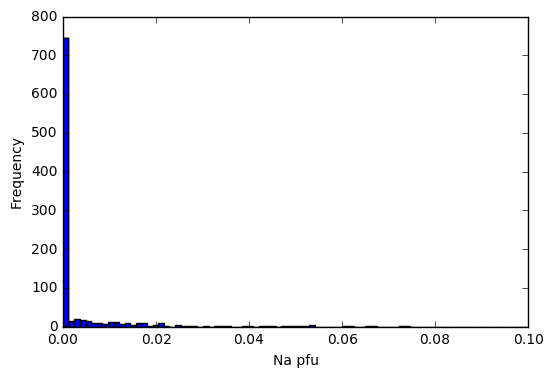

In [10]:
print('Experimental Garnets')
plot_Na_contents(molar_data_exp)

Natural Garnets
Fraction of nearly Na free analyses = 0.985211395391


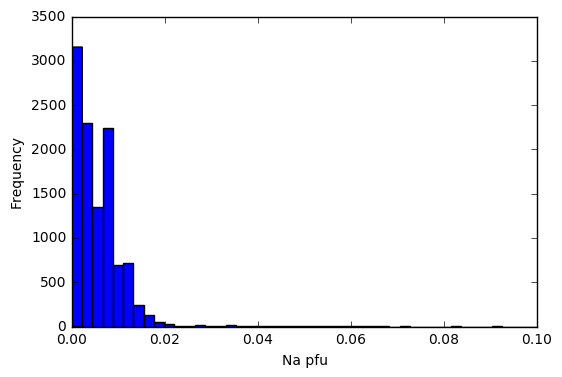

In [11]:
print('Natural Garnets')
plot_Na_contents(molar_data_nat)

In [12]:
def plot_cation_deficiency(molar_data, oxides, ylim=None):
    site_occ_table, output = garnet_basis.garnet_site_occupancy(molar_data['mol_frac_oxides'], oxides, full_output=True)
    output['mol_cation_per_oxy'].head()
    plt.plot(output['total_deficiency'])
    plt.xlabel('Experiment number')
    plt.ylabel('Cation total deficiency')
    plt.title('Total cation deficiency and excess')
    if ylim is not None:
        plt.ylim(ylim)
    
    print('The fraction of data with total cation deficiency magnitude less than 0.1 =', 
          np.mean(np.abs(output['total_deficiency'])<0.1))
    
    pass

The fraction of data with total cation deficiency magnitude less than 0.1 = 0.983086680761


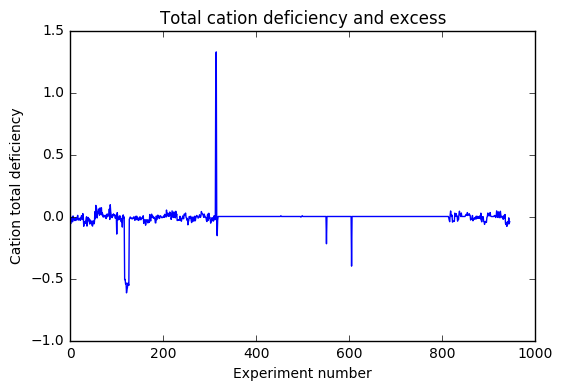

In [13]:
plot_cation_deficiency(molar_data_exp, oxides)

The fraction of data with total cation deficiency magnitude less than 0.1 = 0.989747777173


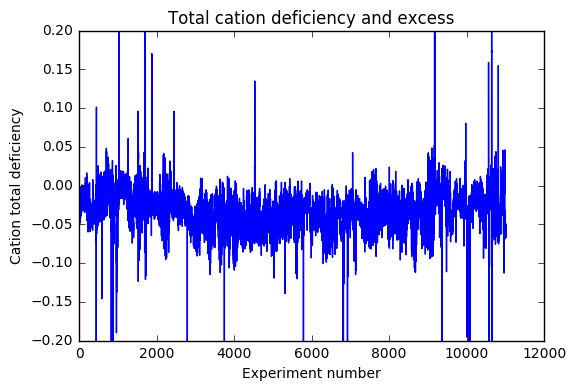

In [14]:
plot_cation_deficiency(molar_data_nat, oxides, ylim=(-0.2,0.2))